In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/UTR5_zinb_norm_singleref_2023-05-23.csv")
df

,seq,cell_type,replicate,1,2,3,4,fold
0,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...,c1,1,21.783451,19.584216,26.037737,27.697943,test
1,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...,c1,2,22.154267,27.511914,30.555378,22.224875,test
2,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...,c17,1,29.351171,22.003513,23.428607,24.169304,test
3,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...,c17,2,23.741326,30.481388,22.441017,24.547200,test
4,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...,c2,1,21.260968,25.937755,26.377798,24.093489,test
...,...,...,...,...,...,...,...,...
216085,CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTT...,c2,2,62.936139,60.451746,56.922544,53.163696,train
216086,CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTT...,c4,1,70.653894,59.045130,47.888778,41.982526,train
216087,CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTT...,c4,2,71.771957,65.284660,52.710214,43.095918,train
216088,CCGTCGTCTCCTCCGCGTCCCCGCCCGCCAGCTGCTGTCGGAGGTT...,c6,1,79.741202,77.539775,70.707311,45.390407,train


In [3]:
df = df.groupby(by=["seq", "cell_type", "fold"])[["1", "2", "3", "4"]].sum().reset_index()

In [4]:
# df = df[df["cell_type"].isin({"c1", "c4", "c17"})].reset_index(drop=True)

In [5]:
bins = np.arange(1, 5)
cpm = df[["1", "2", "3", "4"]]
mass_center = (cpm * bins).sum(axis=1) / cpm.sum(axis=1)
mass_center

0         2.459879
1         2.383516
2         2.499222
3         2.225536
4         2.273239
            ...   
108040    2.646848
108041    2.612441
108042    2.573000
108043    2.540595
108044    2.619768
Length: 108045, dtype: float64

In [6]:
df.insert(7, "mass_center", mass_center)
df

,seq,cell_type,fold,1,2,3,4,mass_center
0,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c1,train,52.125480,52.593756,49.272745,47.834227,2.459879
1,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c17,train,46.974545,51.103420,46.791818,34.483872,2.383516
2,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c2,train,50.231043,56.194372,60.956634,48.531620,2.499222
3,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c4,train,72.587265,56.853170,47.180959,36.766505,2.225536
4,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c6,train,63.071485,42.937131,41.591609,35.795388,2.273239
...,...,...,...,...,...,...,...,...
108040,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c1,train,24.176383,24.721123,32.529211,32.751569,2.646848
108041,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c17,train,43.297184,67.070795,58.874796,63.473836,2.612441
108042,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c2,train,27.537770,22.539731,29.272644,30.646646,2.573000
108043,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c4,train,31.382535,28.750843,30.414356,34.204236,2.540595


In [7]:
mass_center_mean = df.groupby(by=["seq"])["mass_center"].mean().loc[df["seq"]].reset_index(drop=True)
mass_center_mean

0         2.368279
1         2.368279
2         2.368279
3         2.368279
4         2.368279
            ...   
108040    2.598530
108041    2.598530
108042    2.598530
108043    2.598530
108044    2.598530
Name: mass_center, Length: 108045, dtype: float64

In [8]:
mass_center_std = df.groupby(by=["seq"])["mass_center"].std().loc[df["seq"]].reset_index(drop=True)
mass_center_std

0         0.117449
1         0.117449
2         0.117449
3         0.117449
4         0.117449
            ...   
108040    0.041795
108041    0.041795
108042    0.041795
108043    0.041795
108044    0.041795
Name: mass_center, Length: 108045, dtype: float64

In [9]:
df.insert(8, "mass_center_mean", mass_center_mean)
df.insert(9, "mass_center_std", mass_center_std)
df

,seq,cell_type,fold,1,2,3,4,mass_center,mass_center_mean,mass_center_std
0,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c1,train,52.125480,52.593756,49.272745,47.834227,2.459879,2.368279,0.117449
1,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c17,train,46.974545,51.103420,46.791818,34.483872,2.383516,2.368279,0.117449
2,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c2,train,50.231043,56.194372,60.956634,48.531620,2.499222,2.368279,0.117449
3,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c4,train,72.587265,56.853170,47.180959,36.766505,2.225536,2.368279,0.117449
4,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c6,train,63.071485,42.937131,41.591609,35.795388,2.273239,2.368279,0.117449
...,...,...,...,...,...,...,...,...,...,...
108040,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c1,train,24.176383,24.721123,32.529211,32.751569,2.646848,2.598530,0.041795
108041,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c17,train,43.297184,67.070795,58.874796,63.473836,2.612441,2.598530,0.041795
108042,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c2,train,27.537770,22.539731,29.272644,30.646646,2.573000,2.598530,0.041795
108043,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c4,train,31.382535,28.750843,30.414356,34.204236,2.540595,2.598530,0.041795


In [10]:
diffs = (df["mass_center"] - df["mass_center_mean"])
zscores = diffs / df["mass_center_std"]

In [11]:
df.insert(9, "diff", diffs)
df.insert(10, "zscore", zscores)
df

,seq,cell_type,fold,1,2,3,4,mass_center,mass_center_mean,diff,zscore,mass_center_std
0,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c1,train,52.125480,52.593756,49.272745,47.834227,2.459879,2.368279,0.091601,0.779921,0.117449
1,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c17,train,46.974545,51.103420,46.791818,34.483872,2.383516,2.368279,0.015238,0.129738,0.117449
2,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c2,train,50.231043,56.194372,60.956634,48.531620,2.499222,2.368279,0.130943,1.114897,0.117449
3,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c4,train,72.587265,56.853170,47.180959,36.766505,2.225536,2.368279,-0.142742,-1.215358,0.117449
4,AAAAACAACCAGAGGCTGCTCTGCTTGAGGGTGAAGCCGCCTCCCA...,c6,train,63.071485,42.937131,41.591609,35.795388,2.273239,2.368279,-0.095039,-0.809197,0.117449
...,...,...,...,...,...,...,...,...,...,...,...,...
108040,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c1,train,24.176383,24.721123,32.529211,32.751569,2.646848,2.598530,0.048317,1.156046,0.041795
108041,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c17,train,43.297184,67.070795,58.874796,63.473836,2.612441,2.598530,0.013911,0.332836,0.041795
108042,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c2,train,27.537770,22.539731,29.272644,30.646646,2.573000,2.598530,-0.025530,-0.610841,0.041795
108043,TTTTTTCCCTTCTCCTGGCAATCCCTTCCGCTTCCCCGGCTCCCGG...,c4,train,31.382535,28.750843,30.414356,34.204236,2.540595,2.598530,-0.057935,-1.386167,0.041795


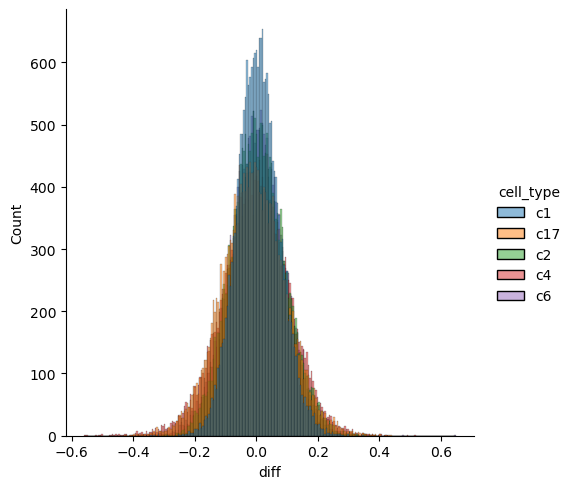

In [12]:
sns.displot(x=df["diff"], hue=df["cell_type"])

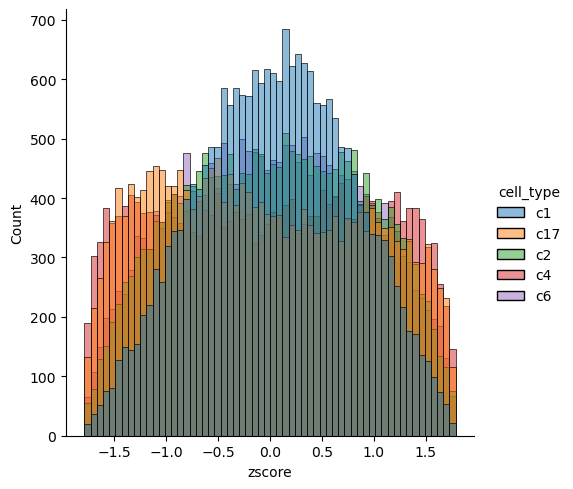

In [13]:
sns.displot(x=df["zscore"], hue=df["cell_type"])

In [14]:
df.to_csv("UTR5_zscores_replicateagg.csv", index=False)